# Pyber Challenge

### 4.3 Loading and Reading CSV files

In [2]:
# Add Matplotlib inline magic command
%matplotlib inline
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd

# File to Load (Remember to change these)
city_data_to_load = "Resources/city_data.csv"
ride_data_to_load = "Resources/ride_data.csv"

# Read the City and Ride Data
city_data_df = pd.read_csv(city_data_to_load)
ride_data_df = pd.read_csv(ride_data_to_load)

### Merge the DataFrames

In [3]:
# Combine the data into a single dataset
pyber_data_df = pd.merge(ride_data_df, city_data_df, how="left", on=["city", "city"])

# Display the data table for preview
pyber_data_df.head()

,city,date,fare,ride_id,driver_count,type
0,Lake Jonathanshire,2019-01-14 10:14:22,13.83,5739410935873,5,Urban
1,South Michelleport,2019-03-04 18:24:09,30.24,2343912425577,72,Urban
2,Port Samanthamouth,2019-02-24 04:29:00,33.44,2005065760003,57,Urban
3,Rodneyfort,2019-02-10 23:22:03,23.44,5149245426178,34,Urban
4,South Jack,2019-03-06 04:28:35,34.58,3908451377344,46,Urban


## Deliverable 1: Get a Summary DataFrame 

In [4]:
#  1. Get the total rides for each city type
gb_types = pyber_data_df.groupby(['type'])
total_rides = gb_types['ride_id'].count()

In [5]:
# 2. Get the total drivers for each city type
total_drivers = gb_types['driver_count'].sum()

In [6]:
#  3. Get the total amount of fares for each city type
total_fares = gb_types['fare'].sum()

In [7]:
#  4. Get the average fare per ride for each city type. 
avg_fare_per_ride = total_fares / total_rides

In [8]:
# 5. Get the average fare per driver for each city type. 
avg_fare_per_driver = total_fares / total_drivers

In [9]:
#  6. Create a PyBer summary DataFrame. 
list_of_series = {'Total Rides':total_rides, 
                  'Total Drivers':total_drivers, 
                  'Total Fares':total_fares, 
                  'Average Fare per Ride':avg_fare_per_ride, 
                  'Average Fare per Driver':avg_fare_per_driver }
pyber_summary_df = pd.DataFrame(list_of_series)

In [10]:
#  7. Cleaning up the DataFrame. Delete the index name
pyber_summary_df.index.name = None

In [11]:
pyber_summary_df.head()

,Total Rides,Total Drivers,Total Fares,Average Fare per Ride,Average Fare per Driver
Rural,125,537,4327.93,34.623440,8.059460
Suburban,625,8570,19356.33,30.970128,2.258615
Urban,1625,59602,39854.38,24.525772,0.668675


In [15]:
#  8. Format the columns.
df = pyber_summary_df.style.format({'Total Rides':'{:,}',
                               'Total Drivers': '{:,}', 
                               'Total Fares' : '${:,.2f}',
                               'Average Fare per Ride' : '${:,.2f}',
                               'Average Fare per Driver' : '${:,.2f}'})
display(df)

,Total Rides,Total Drivers,Total Fares,Average Fare per Ride,Average Fare per Driver
Rural,125,537,"$4,327.93",$34.62,$8.06
Suburban,625,"8,570","$19,356.33",$30.97,$2.26
Urban,"1,625","59,602","$39,854.38",$24.53,$0.67


## Deliverable 2.  Create a multiple line plot that shows the total weekly of the fares for each type of city.

In [12]:
# 1. Read the merged DataFrame
pyber_data_df.head()

,city,date,fare,ride_id,driver_count,type
0,Lake Jonathanshire,2019-01-14 10:14:22,13.83,5739410935873,5,Urban
1,South Michelleport,2019-03-04 18:24:09,30.24,2343912425577,72,Urban
2,Port Samanthamouth,2019-02-24 04:29:00,33.44,2005065760003,57,Urban
3,Rodneyfort,2019-02-10 23:22:03,23.44,5149245426178,34,Urban
4,South Jack,2019-03-06 04:28:35,34.58,3908451377344,46,Urban


In [13]:
# 2. Using groupby() to create a new DataFrame showing the sum of the fares 
#  for each date where the indices are the city type and date.
gb_type_date = pyber_data_df.groupby(['type', 'date'])
fare_sum_per_type_date = gb_type_date['fare'].sum()
fare_sum_per_type_date.head()

type   date               
Rural  2019-01-01 09:45:36    43.69
       2019-01-02 11:18:32    52.12
       2019-01-03 19:51:01    19.90
       2019-01-04 03:31:26    24.88
       2019-01-06 07:38:40    47.33
Name: fare, dtype: float64

In [14]:
# 3. Reset the index on the DataFrame you created in #1. This is needed to use the 'pivot()' function.
pyber_data_df = pyber_data_df.reset_index()

In [15]:
# 4. Create a pivot table with the 'date' as the index, the columns ='type', and values='fare' 
# to get the total fares for each type of city by the date. 
pivot = pyber_data_df.pivot(index='date', columns='type', values='fare')

In [16]:
# 5. Create a new DataFrame from the pivot table DataFrame using loc on the given dates, '2019-01-01':'2019-04-29'.
df = pivot.loc['2019-01-01':'2019-04-29']

In [17]:
# 6. Set the "date" index to datetime datatype. This is necessary to use the resample() method in Step 8.
df.index = pd.to_datetime(df.index)

In [18]:
# 7. Check that the datatype for the index is datetime using df.info()
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2196 entries, 2019-01-01 00:08:16 to 2019-04-28 19:35:03
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Rural     114 non-null    float64
 1   Suburban  573 non-null    float64
 2   Urban     1509 non-null   float64
dtypes: float64(3)
memory usage: 68.6 KB


In [19]:
# 8. Create a new DataFrame using the "resample()" function by week 'W' and get the sum of the fares for each week.
fares_by_week_df = df.resample('W').sum()
fares_by_week_df.head()

type,Rural,Suburban,Urban
date,,,
2019-01-06,187.92,721.60,1661.68
2019-01-13,67.65,1105.13,2050.43
2019-01-20,306.00,1218.20,1939.02
2019-01-27,179.69,1203.28,2129.51
2019-02-03,333.08,1042.79,2086.94


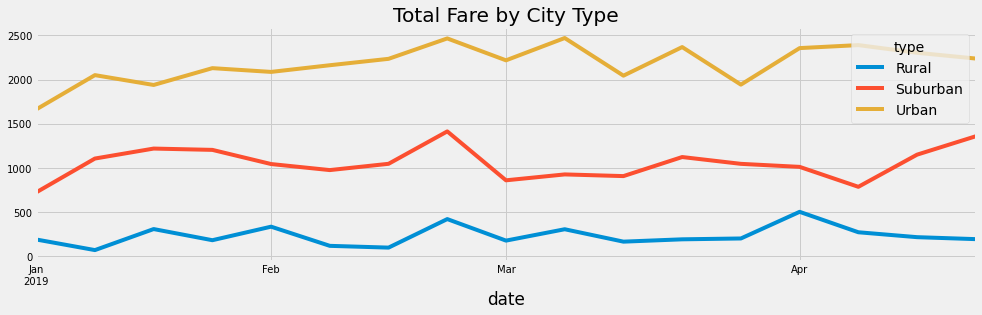

In [27]:
# 8. Using the object-oriented interface method, plot the resample DataFrame using the df.plot() function. 
%matplotlib inline
# Import the style from Matplotlib.
from matplotlib import style
# Use the graph style fivethirtyeight.
style.use('fivethirtyeight')

ax = fares_by_week_df.plot(title='Total Fare by City Type', 
                           figsize=(15, 4),
                           fontsize=10)
